In [37]:
import numpy as np
from numpy import pi, exp, shape, array, r_, c_, dot, nan, inf, where, sqrt, arange
from numpy import log, log10, logspace, zeros

import pandas as pd

import scipy.io
from scipy.integrate import quad, quadrature, romberg
from scipy.optimize import fmin, minimize
from scipy.stats import scoreatpercentile
from scipy.integrate import ode, odeint

from matplotlib import rc
from matplotlib.pylab import *
from matplotlib.mlab import find
#import random, time, os, psutil, datetime, sys

In [2]:
np.set_printoptions(precision=3, edgeitems=8, linewidth=150)

# Introduction

This model is a combination of the kinetic proofreading(KP)-IFFL model from Harris et al. and the Lotka-Volterra model from Sahoo et al. The Lotka-Volterra population growth aspect will be integrated as the growth/death rate of the ligand and receptor in the Harris et al. model. I will try two different versions of the model: the first that is just the base KP-IFFL, and the second integrating the Lotka-Volterra, which will introduce complex feedbacks into the system

## Initialize the ODE model

Define a vector x that contains all the species in the model: x = [L, R, C0, C1, Y, P]

In [80]:
#L = x[0]
#R = x[1]
#C0 = x[2]
#C1 = x[3]
#Y = x[4]
#P = x[5]

def model1(x, t, kon, koff, kp, kact, YT, gam, PT, lam, bet):

    L = x[0]
    R = x[1]
    C0 = x[2]
    C1 = x[3]
    Y = x[4]
    P = x[5]
    
    return np.array([
        -kon*L*R + koff*(C0 + C1),
        -kon*L*R + koff*(C0 + C1),
        kon*L*R - koff*C0 - kp*C0,
        kp*C0 - koff*C1,
        kact*C1*(YT - Y) - gam*Y,
        lam*Y*(PT - P) - bet*C1
    ])

## Simulate the model

In [105]:
#Initialize a vector for the simulation time
tt1 = arange(0,100,1e-1)

#Set parameters for the model

kon = 1e-6
koff = 1e-1
kp = 1
kact = 1
YT = 1e3
gam = 1
PT = 1e3
lam = 1
bet = 1

#Set initial conditions for the model
x0 = [1e3, 1e3, 0, 0, 0, 0]

In [106]:
#Solve system of equations
yy1 = odeint(model1, x0, tt1, args = (kon, koff, kp, kact, YT, gam, PT, lam, bet), atol = 1e-6, rtol = 1e-5)

Text(0.5, 0, 'Time')

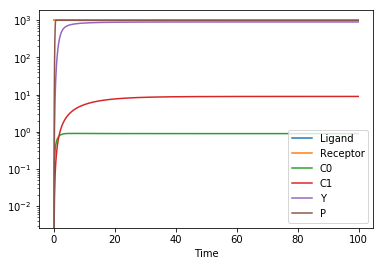

In [107]:
species = ['Ligand', 'Receptor', 'C0', 'C1', 'Y', 'P']

for i,x in enumerate(species):
    plt.plot(tt1, yy1[:,i], label = x)
plt.legend()
plt.yscale('log')
plt.xlabel('Time')

## Scan different ligand concentrations

In [84]:
def sim(L):

    #Set initial conditions for the model
    x0 = np.array([L, 1e3, 0, 0, 0, 0])
    
    yy1 = odeint(model1, x0, tt1, args = (kon, koff, kp, kact, YT, gamma, PT, lam, beta), atol = 1e-6, rtol = 1e-5)
    
    return yy1[-1,:]

In [102]:
LL1 = arange(1,1e6,1e2,float)

Lsim = pd.DataFrame(index = LL1, columns = species)

for i in LL1:
    
    x0 = np.array([i, 1e4, 0, 0, 0, 0])
    
    yy1 = odeint(model1, x0, tt1, args = (kon, koff, kp, kact, YT, gam, PT, lam, bet), atol = 1e-6, rtol = 1e-5)

    Lsim.loc[i,:] = yy1[-1,:]

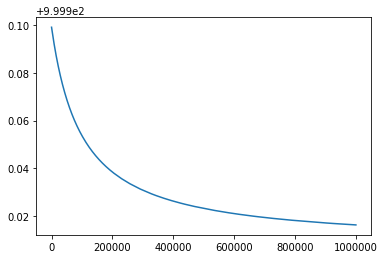

In [103]:
plt.plot(LL1, Lsim.loc[:,'P'])

In [104]:
Lsim

,Ligand,Receptor,C0,C1,Y,P
1.0,0.9901,999.99,0.00900069,0.000899799,0.89896,999.999
101.0,100.001,999.001,0.90818,0.0907909,83.2317,999.999
201.0,199.014,998.014,1.8056,0.180507,152.902,999.999
301.0,298.029,997.029,2.70127,0.270047,212.623,999.999
401.0,397.045,996.045,3.59518,0.359414,264.384,999.999
501.0,496.064,995.064,4.48736,0.448605,309.676,999.999
601.0,595.085,994.085,5.37779,0.53762,349.64,999.998
701.0,694.107,993.107,6.26648,0.626461,385.164,999.998
801.0,793.131,992.131,7.15346,0.715138,416.952,999.998
901.0,892.158,991.158,8.03871,0.803639,445.561,999.998
